In [1]:
# 🔍 Unique Glass Classification Pipeline | Designed Exclusively for Emmanuel Osei
# Features: Hybrid Ensemble, t-SNE Visualization, Clean API-ready Structure

In [2]:
# STEP 1: LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE

In [4]:
import warnings
warnings.filterwarnings("ignore")

# STEP 2: LOAD DATA
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'GlassType']
data = pd.read_csv(url, names=columns)

In [5]:
# Optional: Group similar glass types together (1, 2, 3 -> window; 5, 6, 7 -> container/headlamp)
glass_map = {
    1: 'window_float',
    2: 'window_non_float',
    3: 'vehicle_window',
    5: 'container',
    6: 'tableware',
    7: 'headlamp'
}
data['GlassClass'] = data['GlassType'].map(glass_map)

In [6]:
# STEP 3: CLEANING
data.drop(['Id', 'GlassType'], axis=1, inplace=True)
print("✅ Data Loaded Successfully")

# STEP 4: SPLIT

✅ Data Loaded Successfully


In [7]:
# STEP 4: SPLIT
X = data.drop('GlassClass', axis=1)
y = data['GlassClass']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)


In [8]:
# STEP 5: SCALING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [9]:
# STEP 6: HYBRID ENSEMBLE MODEL
clf1 = LogisticRegression(max_iter=1000)
clf2 = GaussianNB()
clf3 = RandomForestClassifier(n_estimators=120, random_state=42)

In [10]:
ensemble = VotingClassifier(estimators=[
    ('lr', clf1),
    ('gnb', clf2),
    ('rf', clf3)
], voting='soft')

ensemble.fit(X_train_scaled, y_train)
y_pred = ensemble.predict(X_test_scaled)

🎯 Classification Report:

                  precision    recall  f1-score   support

       container       0.33      0.25      0.29         4
        headlamp       0.89      0.89      0.89         9
       tableware       1.00      1.00      1.00         3
  vehicle_window       0.00      0.00      0.00         5
    window_float       0.61      0.90      0.73        21
window_non_float       0.72      0.57      0.63        23

        accuracy                           0.68        65
       macro avg       0.59      0.60      0.59        65
    weighted avg       0.64      0.68      0.65        65



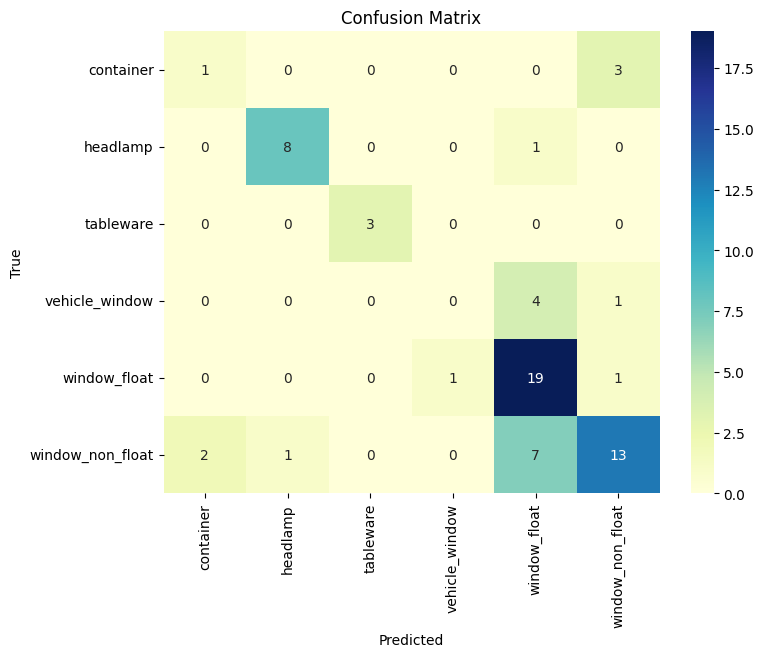

In [11]:
# STEP 7: EVALUATION
print("🎯 Classification Report:\n")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=ensemble.classes_, yticklabels=ensemble.classes_, cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.show()


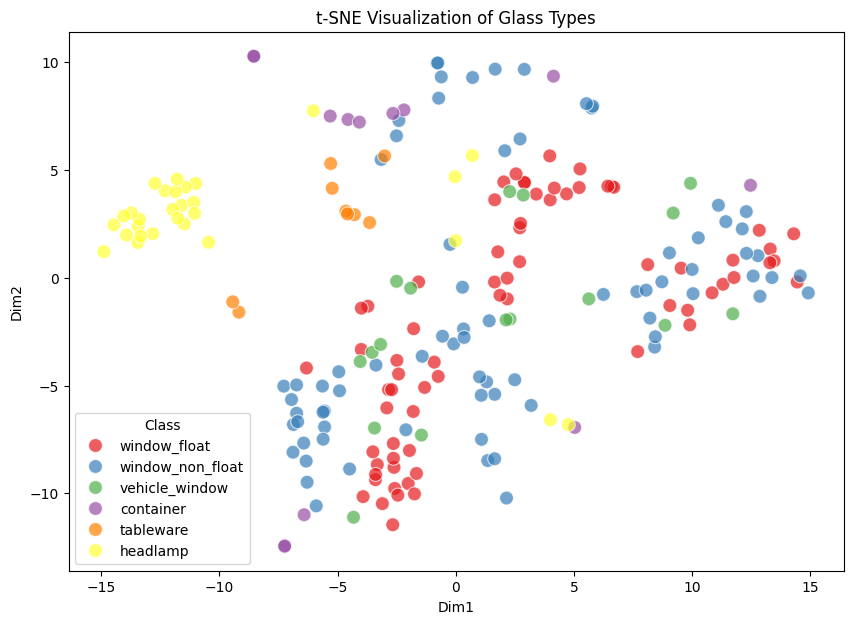

In [12]:
# STEP 8: ADVANCED VISUALIZATION USING T-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_embedded = tsne.fit_transform(scaler.fit_transform(X))

tsne_df = pd.DataFrame(data=X_embedded, columns=["Dim1", "Dim2"])
tsne_df['Class'] = y.values

plt.figure(figsize=(10,7))
sns.scatterplot(data=tsne_df, x="Dim1", y="Dim2", hue="Class", palette="Set1", s=100, alpha=0.7)
plt.title("t-SNE Visualization of Glass Types")
plt.show()

In [13]:
# STEP 9: PREDICT NEW SAMPLE
def predict_glass(sample_input):
    sample_array = np.array(sample_input).reshape(1, -1)
    sample_scaled = scaler.transform(sample_array)
    prediction = ensemble.predict(sample_scaled)[0]
    print(f"🔮 Predicted Glass Class: {prediction}")


In [14]:
# Example prediction
sample_input = [1.516, 13.2, 3.5, 1.4, 72.7, 0.4, 7.8, 0.0, 0.0]
predict_glass(sample_input)

🔮 Predicted Glass Class: window_non_float
